In [13]:
from flyeye.data.experiments import Experiment
from figures.images import Projection
from figures.spatial import Correlation, Periodogram, R8Spacing
%matplotlib inline

# Load Notch ts data

In [3]:
notch_control = Experiment('../data/notch_ts/18c/', normalization='blue', recompile=False)
notch_perturbation = Experiment('../data/notch_ts/28c/', normalization='blue', recompile=False)

# manually align discs
notch_control.apply_lag(10.5)
notch_perturbation.apply_lag(8)
notch_perturbation.discs[2].apply_lag(1)

# Figure 5 A, B

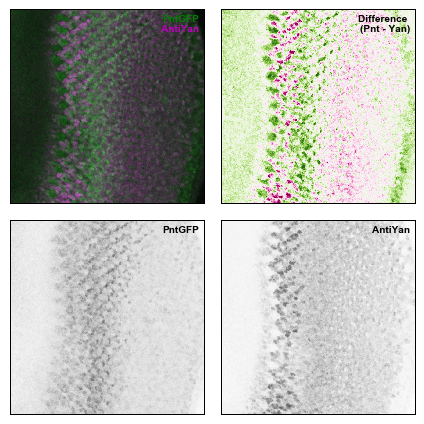

In [6]:
# Fig 5A
disc_id = 0
disc = notch_control.discs[disc_id]
fig5A = Projection(disc)
fig5A.render_all()

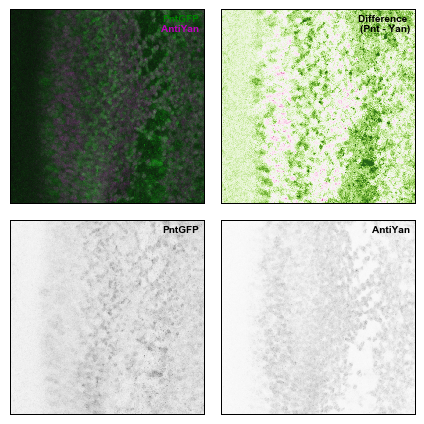

In [7]:
# Fig 5B
disc_id = 1
disc = notch_perturbation.discs[disc_id]
fig5A = Projection(disc)
fig5A.render_all()

# Figure 5 C, F

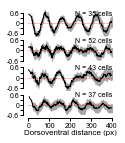

In [8]:
# Fig 5C (notch active)
fig5C = Correlation(notch_control)
fig5C.render(tmin=0, tmax=1.75)

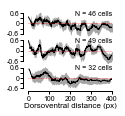

In [9]:
# Fig 5F (notch restricted)
fig5F = Correlation(notch_perturbation)
fig5F.render(tmin=0, tmax=1.75)

# Figure 5 D, G

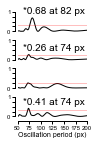

In [10]:
# Fig 5D (notch active)
fig5D = Periodogram(notch_control)
fig5D.render(tmin=0, tmax=1.75)

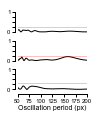

In [11]:
# Fig 5G (notch inactive)
fig5G = Periodogram(notch_perturbation)
fig5G.render(tmin=0, tmax=1.75)

# Figure 5 E

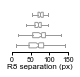

In [12]:
# Fig 5E
fig5E = R8Spacing(notch_control)
fig5E.render()